In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
from tqdm import tqdm

In [2]:
def euler(ro, V, h, sigma=0):
    ro = ro + h * V(ro) + sigma * 2 * np.sqrt(h) * np.random.randn(ro.shape[0])
    return ro

def Mro(ro,f):
    # ro = matrices de forme (n,d) contenant les coordonnées des n particules qui donne la mesure empirique
    # f fonction donnée par le problème
    # M matrice d'information
    n = ro.shape[0]
    M = (f(ro).T).dot(f(ro)) / n
    invM = np.linalg.inv(M)
    return np.linalg.det(M), invM

def Vt (f , df, invM):
    def Vt(x):
        n = x.shape[0]
        vec = np.sum(df(x).dot(invM) * f(x), axis=1) / n
        return vec
    return Vt

def flow(ro0, f, df, h, nt, sigma = 0):
    ro = ro0
    val_list = []
    for i in tqdm(range(nt)):
        val, invM = Mro(ro,f)
        V = Vt(f, df, invM)
        ro = euler(ro, V, h, sigma)
        ro = np.clip(ro, 0, 1)
        val_list.append(val)
    return ro, val_list

f = lambda x : np.array([x ,x**2, x**3]).T

df = lambda x : np.array([x*0+1, 2*x, 3*x**2]).T


In [3]:
ro_star = np.array([(5 - np.sqrt(5))/10, (5 + np.sqrt(5))/10, 1])
ro_star = ro_star[:]
opt = Mro(ro_star, f)[0]

#### $\sigma = 0$, $ h= 0.0002 $, 50000 pas, 100 particules

100%|██████████| 5000000/5000000 [34:18<00:00, 2428.53it/s]  


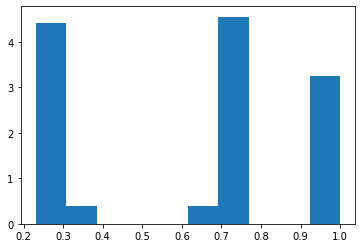

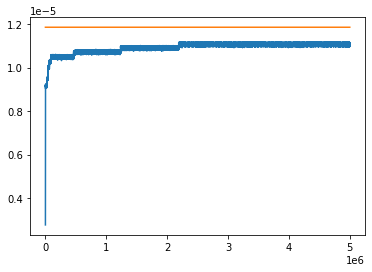

In [4]:
nt = 5000000
h= 0.1
sigma = 0.01 # mettre sigma à 0 pour ne pas ajouter d'entropie
ro = np.linspace(0,1,100)
M, invM = Mro(ro,f)
rof, val_list = flow(ro, f, df, h, nt, sigma)
plt.hist(rof, bins=10, density=True)
plt.show()
plt.plot(np.arange(nt), val_list)
plt.plot(np.arange(nt), opt + 0 * np.arange(nt))
plt.show()

#### 10 particules

In [ ]:
nt = 50000
h= 0.0002
sigma = 0
ro1 = np.array([np.linspace(0,1,10)]).T
M, invM = Mro(ro1,f)
rof1 = flow(ro1, f, df, h, nt, sigma)
print(rof1)
plt.hist(rof1,bins = 20)

#### 10 particules, sigma = 1

In [ ]:
sigma = 1
ro1 = np.array([np.linspace(0,1,20)]).T
M, invM = Mro(ro1,f)
rof2 = flow(ro1, f, df, h, nt, sigma)
print(rof2)
plt.hist(rof2,bins = 20)

#### 50 particules, sigma = 1

In [ ]:
sigma = 1
ro1 = np.array([np.linspace(0,1,50)]).T
M, invM = Mro(ro1,f)
rof2 = flow(ro1, f, df, h, nt, sigma)
print(rof2)
plt.hist(rof2,bins = 20)

#### On deplace la masse un peu vers la droite (loi uniforme sur $[0.5, 1]$), 20 particules $\sigma =0$

In [ ]:
sigma = 0
ro05 = np.array([np.linspace(0.5,1,20)]).T
M, invM = Mro(ro05,f)
rof05 = flow(ro05, f, df, h, nt, sigma)
print(rof05)
plt.hist(rof05,bins = 20)

#### 50 particules $\sigma = 0$

In [ ]:
sigma = 0
ro05 = np.array([np.linspace(0.5,1,50)]).T
M, invM = Mro(ro05,f)
rof05 = flow(ro05, f, df, h, nt, sigma)
print(rof05)
plt.hist(rof05,bins = 20)

#### Sigma = 2

In [ ]:
sigma = 2
ro05 = np.array([np.linspace(0.5,1,20)]).T
M, invM = Mro(ro05,f)
rof05 = flow(ro05, f, df, h, nt, sigma)
print(rof05)
plt.hist(rof05,bins = 20)

#### masse un peu plus sur la droite ($[0.7,1]$)

In [ ]:
sigma = 0
ro07 = np.array([np.linspace(0.7,1,20)]).T
M, invM = Mro(ro07,f)
rof07 = flow(ro07, f, df, h, nt, sigma)
print(rof07)
plt.hist(rof07,bins = 20)

In [ ]:
sigma = 0
ro05 = np.array([np.linspace(0.5,1,50)]).T
M, invM = Mro(ro05,f)
rof05 = flow(ro05, f, df, h, nt, sigma)
print(rof05)
plt.hist(rof05,bins = 20)